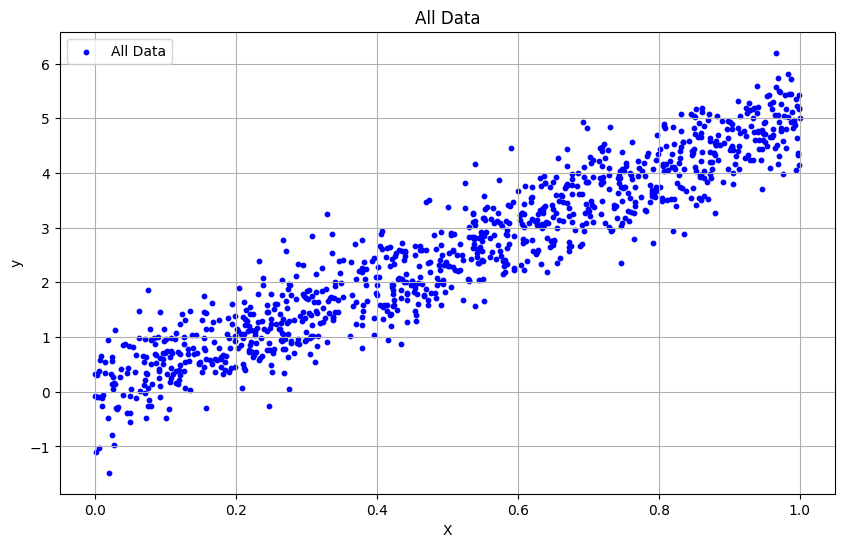

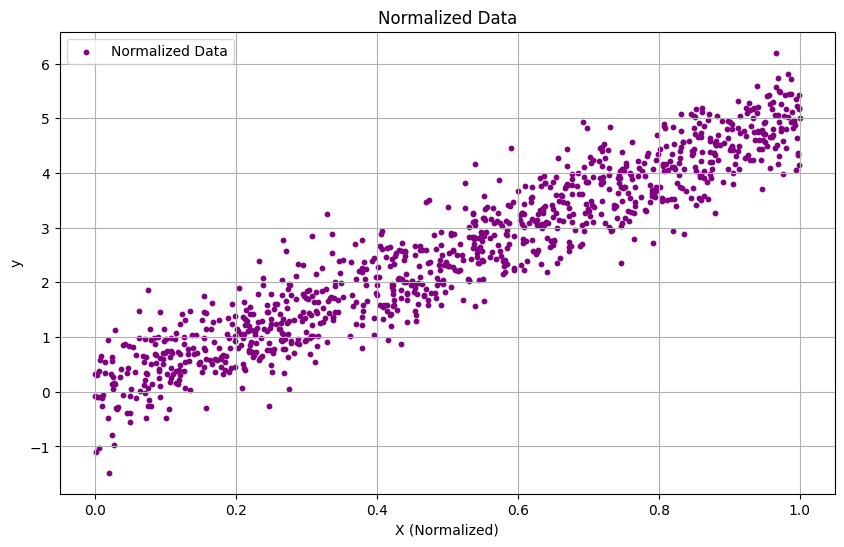

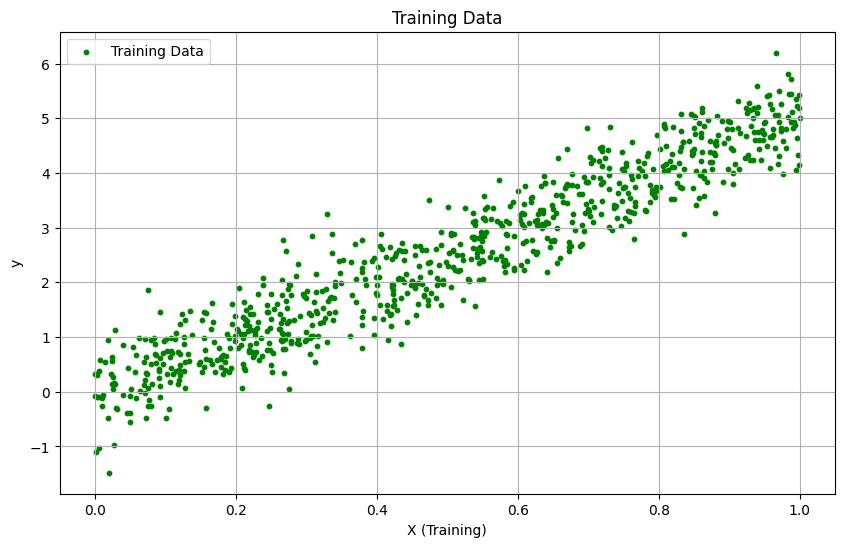

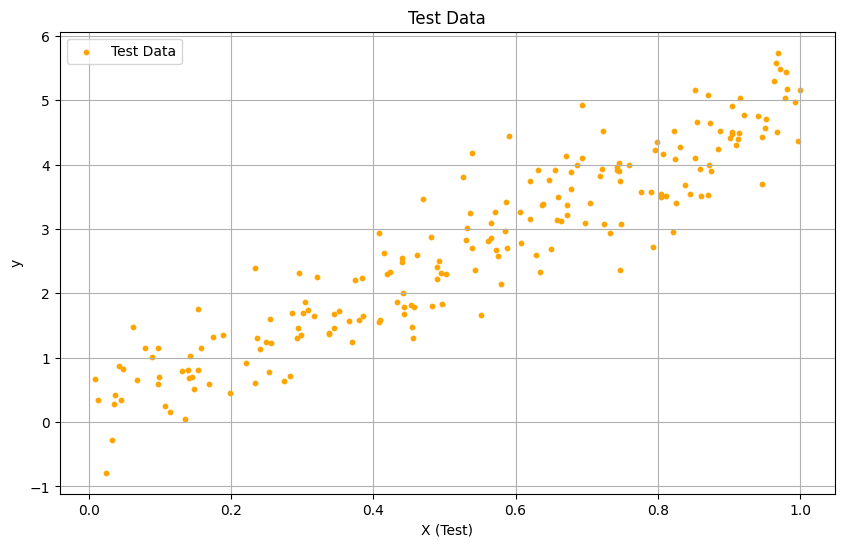

In [91]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate a random dataset
random.seed(42)
X = np.array([random.random() for _ in range(1000)])  # 1000 random values in the range [0, 1]
y = 5 * X + np.array([random.gauss(0, 0.5) for _ in range(1000)])

# Normalize the values
X_min, X_max = min(X), max(X)
X_norm = (X - X_min) / (X_max - X_min)

# Split into training and test sets
train_size = int(0.8 * len(X_norm))
X_train, X_test = X_norm[:train_size], X_norm[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Visualize all data with smaller points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=10, label='All Data')
plt.title('All Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Visualize normalized data
plt.figure(figsize=(10, 6))
plt.scatter(X_norm, y, color='purple', s=10, label='Normalized Data')
plt.title('Normalized Data')
plt.xlabel('X (Normalized)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Visualize training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='green', s=10, label='Training Data')
plt.title('Training Data')
plt.xlabel('X (Training)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Visualize test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='orange', s=10, label='Test Data') 
plt.title('Test Data')
plt.xlabel('X (Test)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Best value of K: 65


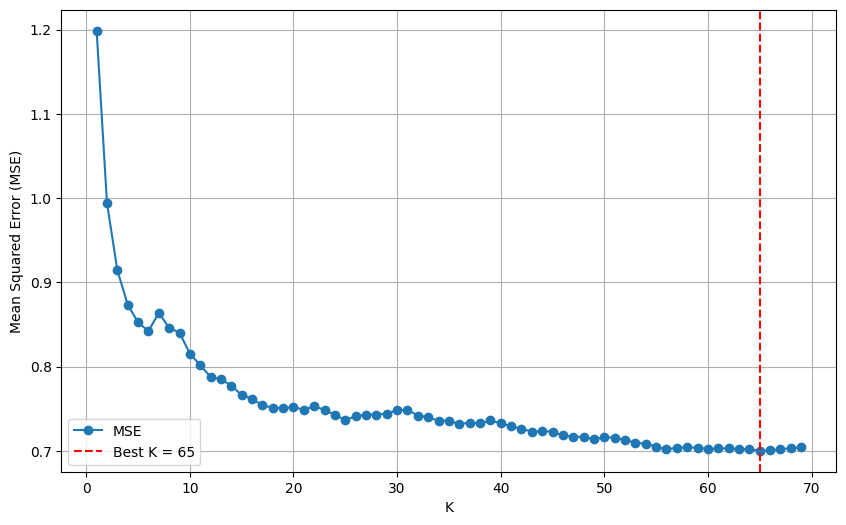

In [90]:
# Implementation of KNN regressor
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        # Calculate distance to all points in the training set
        distances = np.abs(X_train - x)
        # Sort by distances and select K nearest neighbors
        neighbors_idx = np.argsort(distances)[:k]
        neighbors_values = y_train[neighbors_idx]
        # Predict the value as the average of neighbors
        y_pred.append(np.mean(neighbors_values))
    return np.array(y_pred)

# Find the best K and calculate errors
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

k_values = range(1, 70)
errors = []

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
   
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Select the best value of K
best_k = k_values[np.argmin(errors)]
print(f'Best value of K: {best_k}')

# Visualize the error as a function of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', label='MSE')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel('K')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


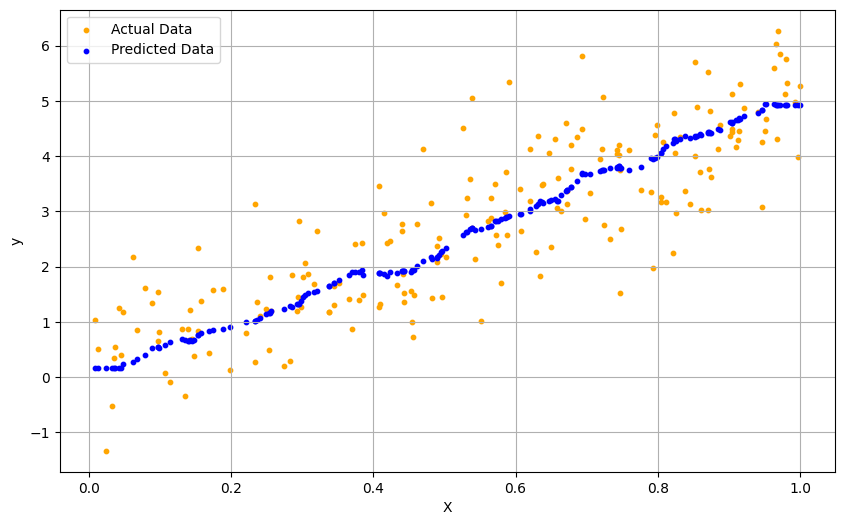

In [89]:
y_pred_best_k = knn_predict(X_train, y_train, X_test, best_k)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='orange', s=10, label='Actual Data')  # Actual data
plt.scatter(X_test, y_pred_best_k, color='blue', s=10, label='Predicted Data')  # Predicted data
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()